<a href="https://colab.research.google.com/github/Arijeet-Mahanty/Image_Recognition_Model_ML/blob/main/Image_Recognition_5Days_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arijeetmahanty","key":"5b94e801ecfaf0407dc917bf03e5245e"}'}

In [3]:
!mkdir~/.kaggle
!cp kaggle.json ~/.kaggle/

/bin/bash: line 1: mkdir~/.kaggle: No such file or directory
cp: cannot create regular file '/root/.kaggle/': Not a directory


In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [7]:
import tensorflow as tf
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}, test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), test shape: (10000, 28, 28)


In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"Train Reshaped: {x_train.shape}")

Train Reshaped: (60000, 28, 28, 1)


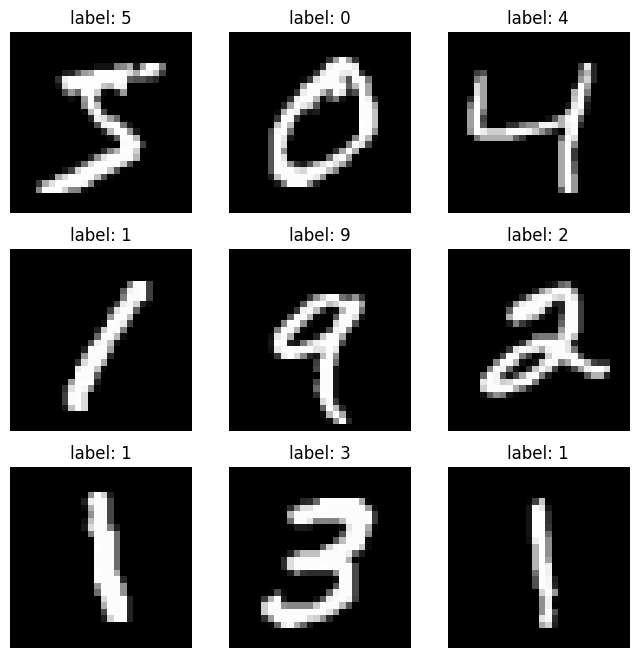

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap="gray")
  plt.title(f"label: {y_train[i]}")
  plt.axis("off")
plt.show()

In [10]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8977 - loss: 0.3234 - val_accuracy: 0.9831 - val_loss: 0.0595
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9845 - loss: 0.0498 - val_accuracy: 0.9861 - val_loss: 0.0515
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9859 - val_loss: 0.0437
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9927 - loss: 0.0219 - val_accuracy: 0.9900 - val_loss: 0.0357
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.9940 - loss: 0.0179 - val_accuracy: 0.9897 - val_loss: 0.0395


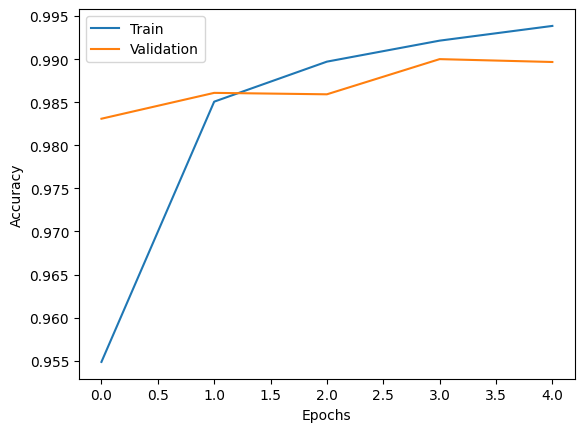

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [14]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9894 - loss: 0.0347
Test Accuracy:0.9919
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [15]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [17]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 65ms/step - accuracy: 0.3210 - loss: 1.8541 - val_accuracy: 0.4125 - val_loss: 1.8247
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 65ms/step - accuracy: 0.4712 - loss: 1.4655 - val_accuracy: 0.4973 - val_loss: 1.4088
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.5177 - loss: 1.3608 - val_accuracy: 0.5014 - val_loss: 1.4681
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.5463 - loss: 1.2797 - val_accuracy: 0.5622 - val_loss: 1.2487
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.5632 - loss: 1.2395 - val_accuracy: 0.6096 - val_loss: 1.1229
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.5818 - loss: 1.1978 - val_accuracy: 0.6329 - val_loss: 1.0431
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.5856 - loss: 1.1828 - val_accuracy: 0.6330 - val_loss: 1.0428
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.6024 - loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1000
           1       0.66      0.92      0.77      1000
           2       0.60      0.50      0.54      1000
           3       0.55      0.33      0.41      1000
           4       0.61      0.49      0.55      1000
           5       0.77      0.36      0.49      1000
           6       0.53      0.90      0.67      1000
           7       0.66      0.77      0.71      1000
           8       0.78      0.71      0.74      1000
           9       0.65      0.80      0.72      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.63     10000
weighted avg       0.66      0.64      0.63     10000



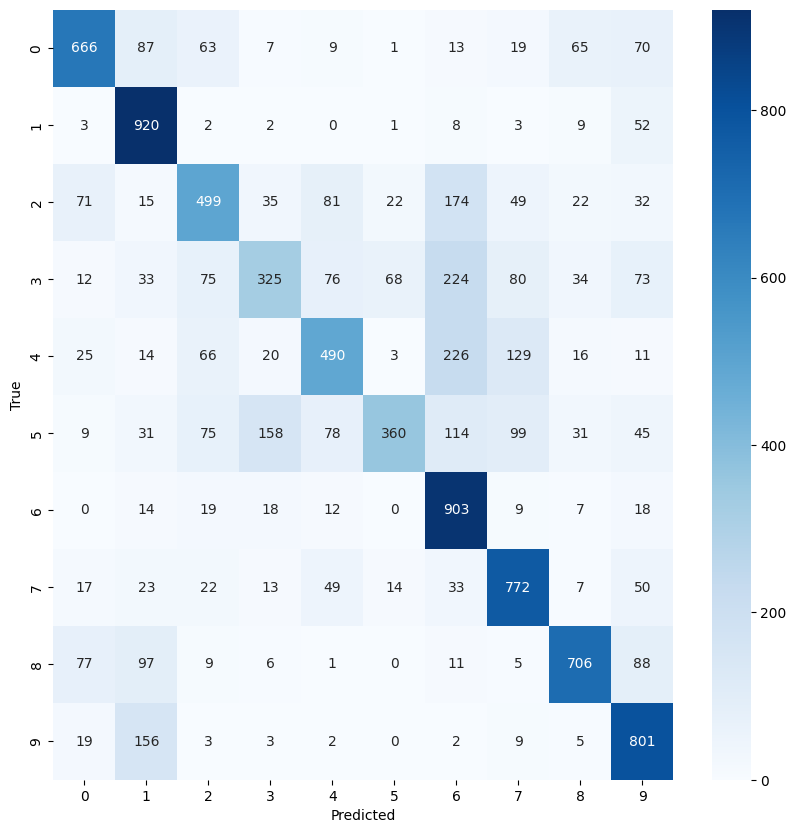

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)
cm = confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 99% 215M/218M [00:00<00:00, 402MB/s]
100% 218M/218M [00:00<00:00, 452MB/s]


In [20]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='validation')


Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable = False


model = Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation = 'relu'),Dense(1,activation = 'sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.7941 - loss: 0.5308 - val_accuracy: 0.7985 - val_loss: 0.5298
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 362s 1s/step - accuracy: 0.8056 - loss: 0.4877 - val_accuracy: 0.7985 - val_loss: 0.5147
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.7992 - loss: 0.4814 - val_accuracy: 0.7985 - val_loss: 0.5148
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 364s 1s/step - accuracy: 0.7935 - loss: 0.4716 - val_accuracy: 0.7985 - val_loss: 0.5428
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.8024 - loss: 0.4488 - val_accuracy: 0.7940 - val_loss: 0.5356


In [23]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1518s 6s/step - accuracy: 0.7873 - loss: 0.5034 - val_accuracy: 0.7975 - val_loss: 0.5388
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1488s 6s/step - accuracy: 0.8027 - loss: 0.4473 - val_accuracy: 0.7950 - val_loss: 0.5351
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1478s 6s/step - accuracy: 0.8114 - loss: 0.4108 - val_accuracy: 0.7965 - val_loss: 0.5373


In [24]:
model.save('mobilenet_cats_dogs.h5')

# To Load
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step


/tmp/ipython-input-3334406742.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


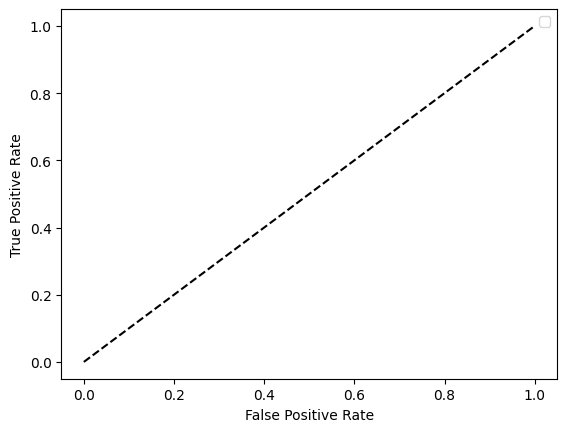

In [25]:
from sklearn.metrics import roc_curve,auc
y_pred_proba = loaded_model.predict(val_generator)
fpr,tpr,_ = roc_curve(val_generator.classes,y_pred_proba)

roc_auc = auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [26]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving download.jpg to download.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Dog


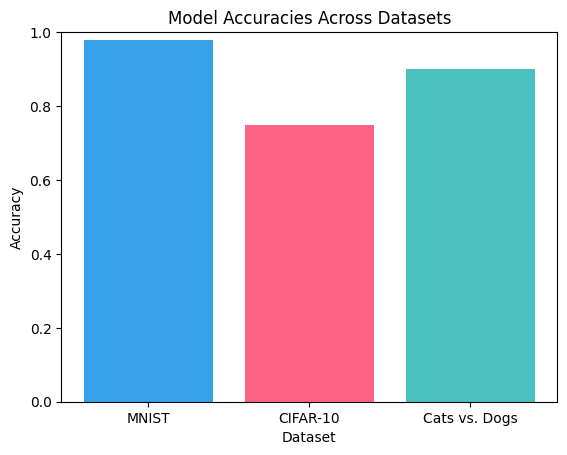

In [27]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()